<a href="https://colab.research.google.com/github/diem-ai/datascience-projects/blob/master/sentiment_mining/sentiment_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Colab Setup**

This part can be skip if the notebook runs in the local

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import sys
# To add a directory with your code into a list of directories 
# which will be searched for packages
sys.path.append('/content/drive/My Drive/Colab Notebooks')

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.corpora import Dictionary as gendict
from gensim.models.ldamodel import LdaModel
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim  

import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
filepath = '/content/drive/My Drive/data/' 

products = pd.read_csv(filepath + "clean_baby_review.csv")
products.dropna(inplace=True)
products = products[['name', 'review', 'rating', 'clean_review', 'review_len', 'word_count']]
products['sentiment'] = products['rating'].apply(lambda x : 1 if (x >= 4)  else(0 if x==3 else -1))

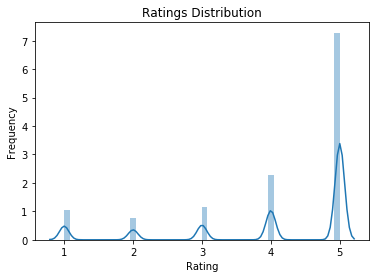

In [4]:
sns.distplot(products['rating'])
plt.title("Ratings Distribution")
plt.ylabel("Frequency")
plt.xlabel("Rating")
plt.show()

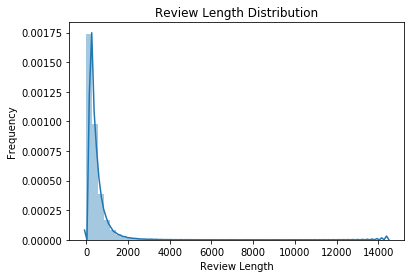

In [13]:
products.dropna(inplace=True)
products['review_len'] = products['review'].apply(lambda x : len(x))

sns.distplot(products['review_len'])
plt.title("Review Length Distribution")
plt.ylabel("Frequency")
plt.xlabel("Review Length")
plt.show()

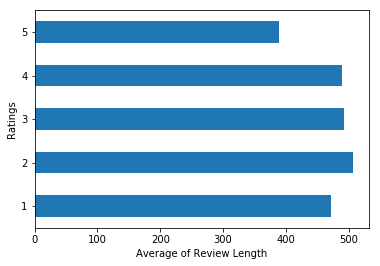

In [14]:
products.groupby(['rating'])['review_len'].mean().plot(kind='barh')
plt.ylabel('Ratings')
plt.xlabel('Average of Review Length')
plt.show()

In [0]:
reviews = products['clean_review'].values

# remove meaningless words
unwanted_words = ["i", "the", "one", "my", "it", "they", "those"
                  , "we", "one", "get", "these", "this", "when"
                  , "a", "he", "she", "s", "also", "even", "would"
                 , "dont", "doesnt"]

reviews_cp = reviews.copy()

reviews = []

for rev in reviews_cp:
  reviews.append(' '.join([word for word in rev.split() if word not in unwanted_words] ))

In [5]:
dictionary = gendict([rev.split() for rev in reviews])

dictionary

what do we know about the dictionary? 
It contains index and word. Lets play a bit with dictionary

In [7]:
# print ten first words

for i in range(10):
  print(dictionary[i])

blue
boyfor
cloth
countwhich
fab
faces
flannel
handles
hands
higher


In [8]:
# show bag of word of 3 words: love, great and disappointed
dictionary.doc2bow(["love", "great", "disappointed"])

[(39, 1), (45, 1), (102, 1)]

In [0]:
# create corpus from our dictionary
# in another, we create bag of word of entire document
bow_corpus =  [dictionary.doc2bow(rev.split()) for rev in reviews]


In [0]:
# Train the model on the bag of word corpus.

lda = LdaModel(bow_corpus
               , num_topics=5
              , id2word=dictionary
              , iterations = 100)

In [12]:
lda.print_topics()


# 

[(0,
  '0.038*"seat" + 0.022*"car" + 0.019*"stroller" + 0.014*"easy" + 0.008*"back" + 0.007*"like" + 0.007*"great" + 0.006*"straps" + 0.006*"use" + 0.006*"chair"'),
 (1,
  '0.009*"like" + 0.007*"crib" + 0.007*"well" + 0.006*"great" + 0.006*"baby" + 0.006*"product" + 0.006*"put" + 0.006*"good" + 0.006*"nice" + 0.006*"little"'),
 (2,
  '0.026*"baby" + 0.018*"love" + 0.016*"great" + 0.013*"loves" + 0.012*"old" + 0.010*"little" + 0.009*"daughter" + 0.008*"cute" + 0.008*"product" + 0.008*"bought"'),
 (3,
  '0.011*"monitor" + 0.009*"baby" + 0.008*"bottle" + 0.007*"use" + 0.007*"product" + 0.006*"bottles" + 0.006*"like" + 0.006*"cup" + 0.006*"time" + 0.005*"great"'),
 (4,
  '0.015*"bag" + 0.013*"use" + 0.010*"diaper" + 0.010*"like" + 0.009*"baby" + 0.008*"love" + 0.008*"great" + 0.007*"little" + 0.006*"easy" + 0.006*"really"')]

In [13]:
# Visualize the topics
# Plotting tools
import pyLDAvis.gensim

pyLDAvis.gensim.prepare(lda, corpus, dictionary)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, bow_corpus, dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003740  0.019457       1        1  21.533424
2     -0.095744  0.159116       2        1  21.488091
4      0.031733 -0.038497       3        1  20.574471
3     -0.113756 -0.141635       4        1  19.041494
0      0.174027  0.001560       5        1  17.362524, topic_info=      Category          Freq         Term         Total  loglift  logprob
580    Default  46267.000000         seat  46267.000000  30.0000  30.0000
575    Default  26928.000000          car  26928.000000  29.0000  29.0000
581    Default  23402.000000     stroller  23402.000000  28.0000  28.0000
1540   Default  21489.000000          bag  21489.000000  27.0000  27.0000
82     Default  20110.000000        loves  20110.000000  26.0000  26.0000
1907   Default  15022.000000      monitor  15022.000000  25.0000  25.0000
173    Default  15298.000000       diaper  15298.000000  24.0000  24.0000
171    Default  76971.000000         baby  76971.000000  23.0000  23.0000
2414   Default  10300.000000       bottle  10300.000000  22.0000  22.0000
1429   Default  10313.000000         crib  10313.000000  21.0000  21.0000
129    Default  16950.000000         cute  16950.000000  20.0000  20.0000
45     Default  51450.000000         love  51450.000000  19.0000  19.0000
7813   Default   8751.000000      bottles   8751.000000  18.0000  18.0000
2697   Default   7541.000000       straps   7541.000000  17.0000  17.0000
965    Default   8071.000000      diapers   8071.000000  16.0000  16.0000
1364   Default   7273.000000        chair   7273.000000  15.0000  15.0000
4954   Default   7114.000000        seats   7114.000000  14.0000  14.0000
100    Default   8092.000000         gift   8092.000000  13.0000  13.0000
529    Default  30659.000000          old  30659.000000  12.0000  12.0000
7821   Default   6924.000000         pump   6924.000000  11.0000  11.0000
1699   Default  10601.000000          cup  10601.000000  10.0000  10.0000
8176   Default   6729.000000       camera   6729.000000   9.0000   9.0000
864    Default   7278.000000          toy   7278.000000   8.0000   8.0000
98     Default  43793.000000         easy  43793.000000   7.0000   7.0000
21     Default  19504.000000      quality  19504.000000   6.0000   6.0000
1541   Default   5769.000000         cups   5769.000000   5.0000   5.0000
241    Default   7902.000000         food   7902.000000   4.0000   4.0000
11044  Default   5156.000000       britax   5156.000000   3.0000   3.0000
73     Default  22997.000000     daughter  22997.000000   2.0000   2.0000
718    Default   7648.000000       colors   7648.000000   1.0000   1.0000
...        ...           ...          ...           ...      ...      ...
2695    Topic5   1426.895264        snack   1529.073975   1.6817  -6.7594
4951    Topic5   2651.244141      harness   3145.075684   1.5800  -6.1399
425     Topic5   2654.136230       height   3164.970215   1.5748  -6.1388
2418    Topic5   2038.292969        folds   2315.932617   1.6232  -6.4028
3415    Topic5   4363.946777      install   5894.857910   1.4502  -5.6416
2678    Topic5   2870.789307         fold   3542.557861   1.5406  -6.0604
318     Topic5   4805.645508        front   6819.487305   1.4009  -5.5452
944     Topic5   3166.174072       safety   4235.063477   1.4600  -5.9624
98      Topic5  17495.664062         easy  43793.203125   0.8333  -4.2530
69      Topic5  10172.570312         back  23670.041016   0.9063  -4.7953
519     Topic5   3264.297852          sit   4538.445312   1.4213  -5.9319
127     Topic5   7110.202637        child  14883.978516   1.0121  -5.1534
54      Topic5   5355.282715  comfortable  10392.055664   1.0879  -5.4369
2538    Topic5   2702.686035       adjust   3659.039795   1.4479  -6.1207
1035    Topic5   5345.026367       easily  14151.718750   0.7772  -5.4388
740     Topic5   3856.389648         high   7521.417969   1.0828  -5.7652
79      Topic5   8377.47460

**Intepretation**

- Topic 1: bags and diapers products and their quality is great
- Topic 2:  products are easy to use for baby
- Topic 3: the same to topic 2
- Topic 4: toys like: car, seat and stroller
- Topic 5: another products of baby: monitor, bottles , cup and pumps. It is similar to topic 1

Finally, we have 3 different topics at the first try. We will try with numer of topics = 10 to see if we can find out some other interesting topics

In [0]:
lda = LdaModel(bow_corpus
               , num_topics=10
              , id2word=dictionary
              , iterations = 100)

In [9]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, bow_corpus, dictionary)
vis


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.031379 -0.004177       1        1  16.806149
1     -0.060347  0.019642       2        1  14.903758
0      0.023953 -0.060022       3        1  12.680782
5      0.039232 -0.092321       4        1   9.449838
4      0.128771  0.210374       5        1   9.012117
7      0.109439  0.135648       6        1   8.546137
8      0.025248 -0.074629       7        1   8.393158
3      0.010017 -0.099330       8        1   8.369001
9      0.032688 -0.119700       9        1   8.222150
2     -0.340380  0.084516      10        1   3.616906, topic_info=      Category          Freq       Term         Total  loglift  logprob
580    Default  43851.000000       seat  43851.000000  30.0000  30.0000
575    Default  25519.000000        car  25519.000000  29.0000  29.0000
1540   Default  20818.000000        bag  20818.000000  28.0000  28.0000
581    Default  21630.000000   stroller  21630.000000  27.0000  27.0000
98     Default  42590.000000       easy  42590.000000  26.0000  26.0000
1907   Default  13056.000000    monitor  13056.000000  25.0000  25.0000
45     Default  48064.000000       love  48064.000000  24.0000  24.0000
173    Default  14821.000000     diaper  14821.000000  23.0000  23.0000
171    Default  76300.000000       baby  76300.000000  22.0000  22.0000
102    Default  57987.000000      great  57987.000000  21.0000  21.0000
2414   Default  11784.000000     bottle  11784.000000  20.0000  20.0000
62     Default  13734.000000       soft  13734.000000  19.0000  19.0000
129    Default  15157.000000       cute  15157.000000  18.0000  18.0000
7813   Default  10014.000000    bottles  10014.000000  17.0000  17.0000
1699   Default  11643.000000        cup  11643.000000  16.0000  16.0000
529    Default  32234.000000        old  32234.000000  15.0000  15.0000
7821   Default   7924.000000       pump   7924.000000  14.0000  14.0000
241    Default   8839.000000       food   8839.000000  13.0000  13.0000
965    Default   7819.000000    diapers   7819.000000  12.0000  12.0000
1429   Default  10354.000000       crib  10354.000000  11.0000  11.0000
49     Default  20922.000000  recommend  20922.000000  10.0000  10.0000
21     Default  17612.000000    quality  17612.000000   9.0000   9.0000
82     Default  20320.000000      loves  20320.000000   8.0000   8.0000
183    Default  17542.000000    perfect  17542.000000   7.0000   7.0000
31     Default  48283.000000        use  48283.000000   6.0000   6.0000
1541   Default   6601.000000       cups   6601.000000   5.0000   5.0000
1364   Default   6893.000000      chair   6893.000000   4.0000   4.0000
4954   Default   6742.000000      seats   6742.000000   3.0000   3.0000
3306   Default   8613.000000      water   8613.000000   2.0000   2.0000
922    Default  12359.000000      clean  12359.000000   1.0000   1.0000
...        ...           ...        ...           ...      ...      ...
12304  Topic10    340.103424    charged    341.054626   3.3168  -6.6246
2731   Topic10    336.513214        lip    337.464539   3.3167  -6.6353
1915   Topic10   3791.406982       unit   3848.057617   3.3047  -4.2134
13572  Topic10   1363.838379     vision   1374.092529   3.3121  -5.2358
1409   Topic10    890.016235       bowl    896.772522   3.3120  -5.6627
6710   Topic10    439.896881   warranty    441.529938   3.3158  -6.3674
5587   Topic10    396.998627      combo    398.193268   3.3165  -6.4700
1416   Topic10   2040.004028       hear   2155.648193   3.2644  -4.8332
4806   Topic10   1998.530396      range   2132.197754   3.2548  -4.8537
3167   Topic10   1224.748169     device   1307.303955   3.2543  -5.3434
3516   Topic10   1264.253052      power   1390.545898   3.2243  -5.3117
8024   Topic10    732.817444       lids    793.732056   3.2397  -5.8570
2120   Topic10    679.067627    plugged    728.652161   3.2491  -5.9332
685    Topic10   2611.915527    battery   3446.904297   3.0422  -4.58

In [110]:
topics = lda.print_topics(num_topics=10, num_words=10)

for (idx, topic) in topics:
  print("topic: {}\n{}".format(idx+1, topic))

topic: 1
0.026*"love" + 0.025*"great" + 0.022*"little" + 0.020*"cute" + 0.017*"baby" + 0.014*"perfect" + 0.013*"nice" + 0.012*"loves" + 0.012*"like" + 0.012*"well"
topic: 2
0.023*"stroller" + 0.009*"like" + 0.008*"easy" + 0.007*"back" + 0.006*"really" + 0.006*"use" + 0.005*"easily" + 0.005*"little" + 0.005*"side" + 0.005*"small"
topic: 3
0.033*"seat" + 0.019*"car" + 0.018*"old" + 0.012*"baby" + 0.010*"son" + 0.009*"loves" + 0.009*"daughter" + 0.008*"little" + 0.008*"like" + 0.007*"love"
topic: 4
0.031*"baby" + 0.020*"product" + 0.016*"quality" + 0.014*"great" + 0.013*"received" + 0.012*"gift" + 0.011*"good" + 0.011*"love" + 0.010*"made" + 0.010*"price"
topic: 5
0.027*"monitor" + 0.014*"baby" + 0.013*"night" + 0.009*"sound" + 0.008*"unit" + 0.008*"room" + 0.008*"time" + 0.008*"video" + 0.007*"product" + 0.007*"battery"
topic: 6
0.029*"bag" + 0.021*"diaper" + 0.013*"use" + 0.011*"diapers" + 0.010*"like" + 0.007*"bags" + 0.007*"cloth" + 0.006*"case" + 0.006*"ve" + 0.006*"dry"
topic: 7
0.0

**Intepretation**

- topic 1: possitive  feedbacks for baby products
- topic 2: stroller and easy use
- topic 3: baby girls love car toys
- topic 4: products have good price. It is quite duplicated with topic 1
- topic 5: video game
- topic 6: baby cloths
- topic 7: sleepping products
- topic 8: seating products for baby (britax). It is similar to topic 2
- topic 9: cater products (bottles, cup, milk, water)
- topic 10: good feedbacks. The same to topic 1

At the end, we have 8 topics after tunning parameters and the result sounds interesting.